In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [0]:
base_dir = '/Users/canrobins13/Desktop'

In [0]:
def adjust_gamma(img, gamma=1.0):
  if gamma == 1.0:
    return img
  img = (img * 255).astype(np.uint8)
  table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255
    for i in np.arange(0, 256)]).astype(np.uint8)

  return cv2.LUT(img, table)

In [0]:
def display_row(base_dir=base_dir, num=24, r=0, c=0, dr=100, dc=100, scale=2, gamma=1.5, title=False, axis=False, wspace=0.02):
  dir_ = os.path.join(base_dir, 'output_ims_{}'.format(num))
  lr = plt.imread(os.path.join(dir_, 'lr_{}.png'.format(num)))
  hr = plt.imread(os.path.join(dir_, 'hr{}.png'.format(num)))
  bilinear = plt.imread(os.path.join(dir_, 'bilinear_upsampling_{}.png'.format(num)))
  sr_gan = plt.imread(os.path.join(dir_, 'sr_gan_{}.png'.format(num)))
  sr_mae = plt.imread(os.path.join(dir_, 'sr_mae_{}.png'.format(num)))

  _, axs = plt.subplots(1, 5, figsize=(20, 4))
  axs = axs.flatten()

  axs[0].imshow(adjust_gamma(sr_gan, gamma=gamma)[r:r+dr, c:c+dc, :])
  axs[1].imshow(adjust_gamma(sr_mae, gamma=gamma)[r:r+dr, c:c+dc, :])
  axs[2].imshow(adjust_gamma(bilinear, gamma=gamma)[r:r+dr, c:c+dc, :])
  axs[3].imshow(adjust_gamma(hr, gamma=gamma)[r:r+dr, c:c+dc, :])
  axs[4].imshow(adjust_gamma(lr, gamma=gamma)[r//scale:(r+dr)//scale, c//scale:(c+dc)//scale, :])

  if title:
    font = {'family': 'Serif', 'weight': 'bold', 'size': 19}
    plt.rc('font', **font)
    axs[0].set_title('Super Resolution GAN')
    axs[1].set_title('Super Resolution MAE')
    axs[2].set_title('Bilinear Upsampling')
    axs[3].set_title('Original Resolution')
    axs[4].set_title('Low Resolution')

  if not axis:
    for i in range(5):
      axs[i].set_axis_off()

  plt.subplots_adjust(wspace=wspace, hspace=0.02, left=0, right=1, bottom=0, top=1)
  plt.show()


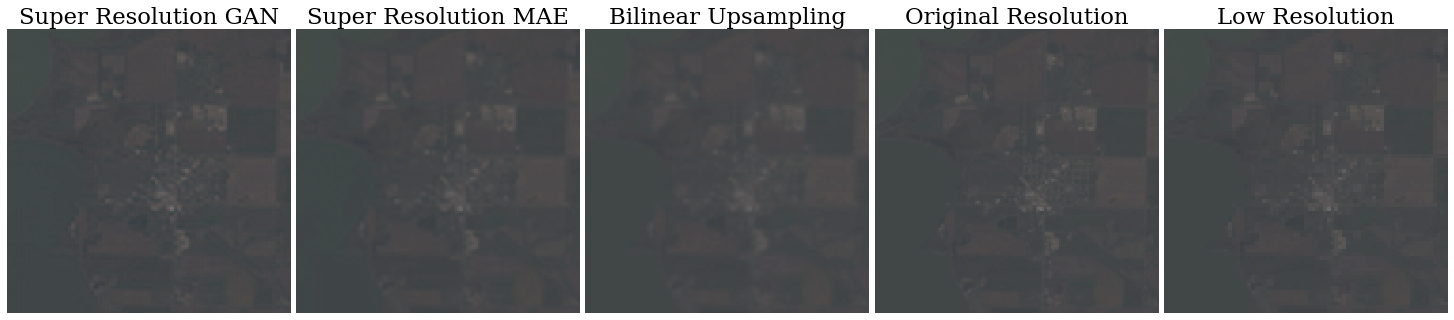

In [151]:
display_row(base_dir=base_dir, num=24, r=100, c=280, dr=150, dc=150, gamma=1.1, title=True)

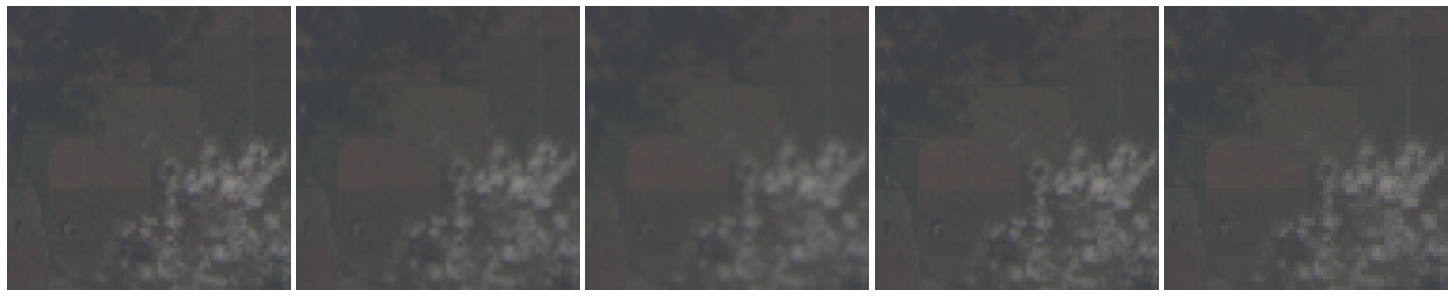

In [152]:
display_row(base_dir=base_dir, num=27, r=450, c=320, dr=150, dc=150, gamma=1.1)

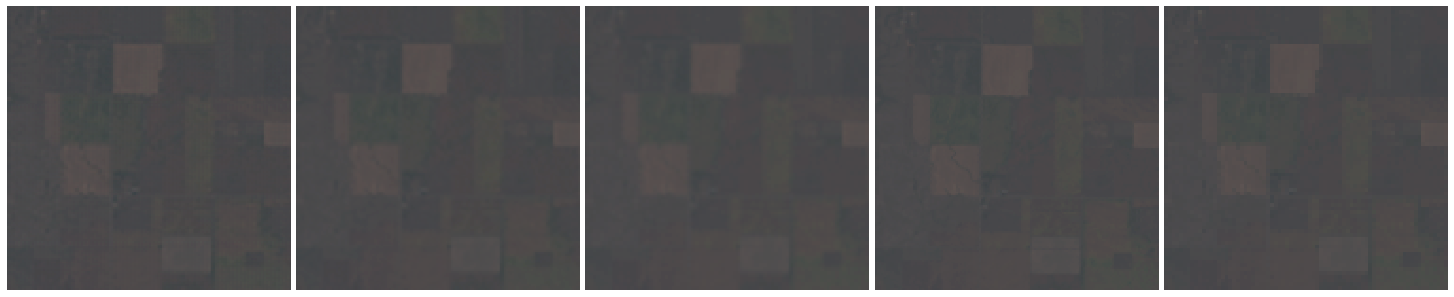

In [153]:
display_row(base_dir=base_dir, num=26, r=450, c=0, dr=150, dc=150, gamma=1.1)

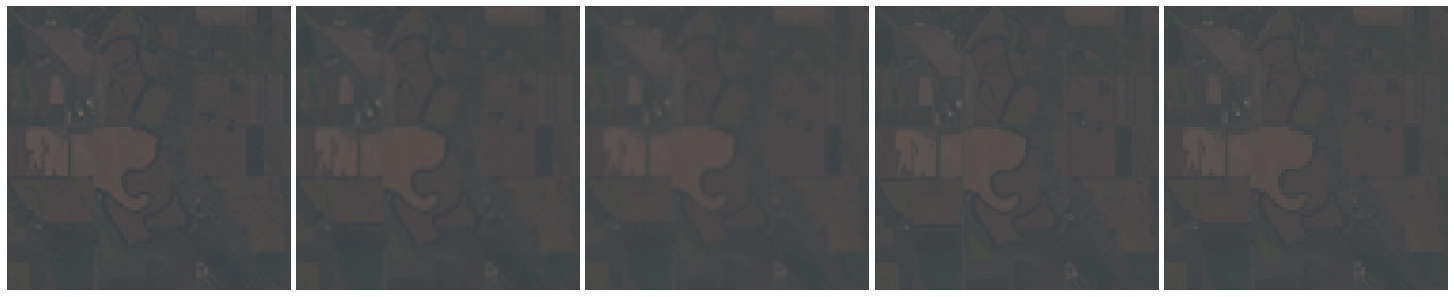

In [154]:
display_row(base_dir=base_dir, num=25, r=350, c=0, dr=150, dc=150, gamma=1.1)

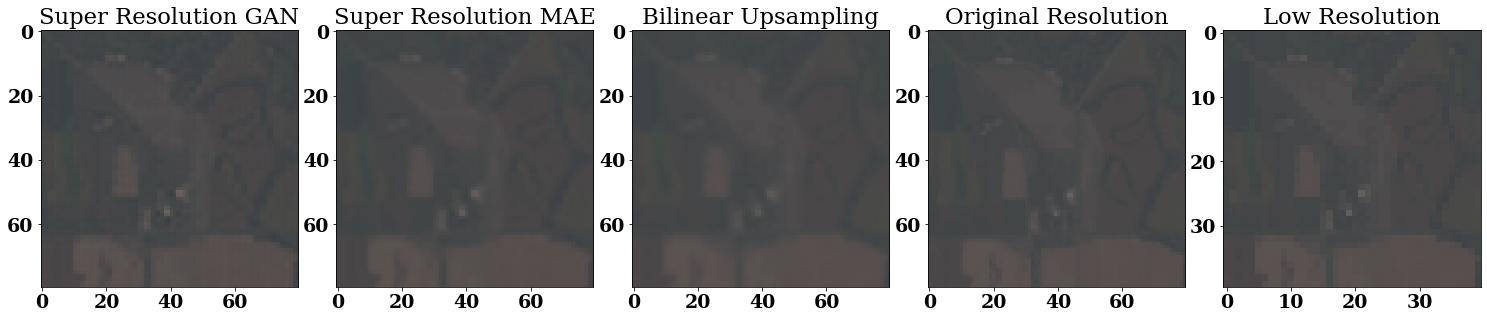

In [165]:
display_row(base_dir=base_dir, num=25, r=350, c=0, dr=80, dc=80, gamma=1.1, title=True, axis=True, wspace=0.15)